In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
#import the data
airbnb_us = pd.read_csv(r"C:\Users\irene\OneDrive\Desktop\GA_DSI\dsi-flex-817\Capstone I.I\Data\AB_US_2020.csv")
airbnb_us.head()

C:\Users\irene\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville

In [3]:
airbnb_us.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
airbnb_us.groupby('minimum_nights')['room_type'].value_counts()

minimum_nights  room_type      
1               Entire home/apt    31598
                Private room       25526
                Shared room         1865
                Hotel room          1438
2               Entire home/apt    40029
                Private room       14104
                Shared room          385
                Hotel room           230
3               Entire home/apt    24293
                Private room        6342
                Shared room          218
                Hotel room            78
4               Entire home/apt     7628
                Private room        1787
                Shared room           75
                Hotel room            23
5               Entire home/apt     7114
                Private room        2183
                Shared room           83
                Hotel room            25
6               Entire home/apt     1468
                Private room         497
                Shared room           14
                Hotel roo

In [5]:
gdf = gpd.GeoDataFrame(
 airbnb_us, geometry=gpd.points_from_xy(airbnb_us.longitude, airbnb_us.latitude))

In [6]:
gdf.head()

id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city                    geometry  
0  Asheville  POINT (-82.62792 35.65146)  
1  Asheville  POINT (-82.55540 35.59779)  
2  Asheville  POINT (-82.55563 35.60670)  
3  Asheville  POINT (-82.59578 35.57864)  
4  Asheville  POINT (-82.54127 35.61442)

<Figure size 1440x1080 with 0 Axes>

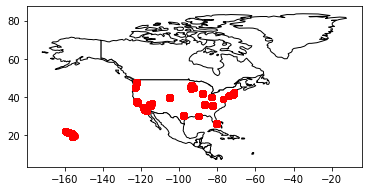

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=(20,15))
# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

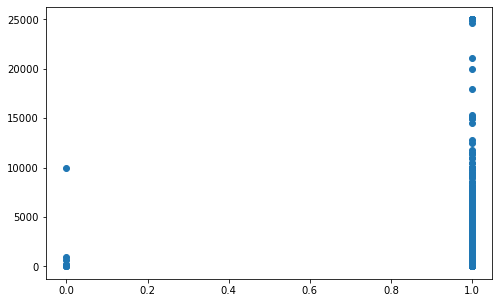

In [8]:
plt.figure(figsize=(8,5))

plt.scatter(x= (airbnb_us['minimum_nights']<=1000) , y=airbnb_us['price']);

In [9]:
min(airbnb_us['price'])

0

In [10]:
airbnb_us['price'].idxmax()

1845

In [11]:
airbnb_us.sort_values('price', ascending= True).head(5)

id                        name    host_id        host_name  \
158818  42431489                 Doxie Hotel  318753867      Doxie Hotel   
11106   42738847       Hotel Granduca Austin  314291208   Hotel Granduca   
157909  41740615  The James New York - NoMad  268417148  The James NoMad   
158633  42279171              The Leon Hotel  265458818   The Leon Hotel   
158741  42384530               Hotel Shocard  265195377    Hotel Shocard   

       neighbourhood_group     neighbourhood  latitude  longitude   room_type  \
158818           Manhattan           Midtown  40.75468  -73.99110  Hotel room   
11106                  NaN             78746  30.30181  -97.82910  Hotel room   
157909           Manhattan           Midtown  40.74459  -73.98574  Hotel room   
158633           Manhattan         Chinatown  40.71610  -73.99518  Hotel room   
158741           Manhattan  Theater District  40.75542  -73.98808  Hotel room   

        price  minimum_nights  number_of_reviews last_review  \
158818      0               1                  0         NaN   
11106       0               1                  0         NaN   
157909      0               1                  0         NaN   
158633      0               1                  0         NaN   
158741      0               1                  0         NaN   

        reviews_per_month  calculated_host_listings_count  availability_365  \
158818                NaN                               1                 0   
11106                 NaN                               1                 0   
157909                NaN                               4                 0   
158633                NaN                               7                 0   
158741                NaN                               3                 0   

                 city                    geometry  
158818  New York City  POINT (-73.99110 40.75468)  
11106          Austin  POINT (-97.82910 30.30181)  
157909  New York City  POINT (-73.98574 40.74459)  
158633  New York City  POINT (-73.99518 40.71610)  
158741  New York City  POINT (-73.98808 40.75542)

In [12]:
airbnb_us_cl = airbnb_us.copy()

In [13]:
#In this dataset I have 62 rows where the price is equal to zero 
airbnb_us_cl.loc[(airbnb_us_cl['price'] == 0)].shape

(62, 18)

In [14]:
min(airbnb_us['price'])

0

In [15]:
airbnb_us_cl.groupby(['city', 'room_type', 'price']
                ).size().unstack(fill_value=0)

price                              0      1      5      9      10     11     \
city              room_type                                                   
Asheville         Entire home/apt      0      0      0      0      0      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Austin            Entire home/apt      0      1      0      0      0      0   
                  Hotel room           1      0      0      0      0      0   
                  Private room         0      3      1      0      5      0   
                  Shared room          0      0      0      0      0      0   
Boston            Entire home/apt      0      0      0      0      0      0   
                  Hotel room           2      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Broward County    Entire home/apt      1      0      1      0      4      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         1      0      0      0      1      0   
                  Shared room          0      0      0      0      0      0   
Cambridge         Entire home/apt      0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Chicago           Entire home/apt      0      0      0      0      2      0   
                  Hotel room           1      0      0      0      0      0   
                  Private room         0      0      0      0      1      0   
                  Shared room          0      0      0      0      1      0   
Clark County      Entire home/apt      0      0      0      0      0      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Columbus          Entire home/apt      0      0      0      0      1      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Denver            Entire home/apt      0      0      0      0      2      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Hawaii            Entire home/apt      0      0      0      0      0      0   
                  Hotel room           1      0      0      0      0      0   
                  Private room         0      0      0      0      1      0   
                  Shared room          0      0      0      0      0      0   
Jersey City       Entire home/apt      0      0      0      0      0      0   
                  Hotel room           0      0      0      0      0      0   
                  Private room         0      0      0      0      0      0   
                  Shared room          0      0      0      0      0      0   
Los Angeles       Entire home/apt      0      0      0      0      4      0   
                  Hotel room          10      0      0      0      0      0   
                  Private room         0      0      0      0      1      0   
                  Shared room          0      0      0      0      0      1   
Nashville         Entire home/apt      0      1      1      0      1      0   
                  Hotel room           0      0   

<AxesSubplot:ylabel='city'>

<Figure size 1440x1080 with 0 Axes>

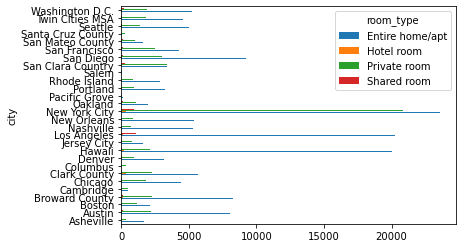

In [16]:
plt.figure(figsize=(20,15))
airbnb_us_cl.groupby(['city','room_type']
                ).size().unstack(fill_value=0).plot(kind="barh")

In [17]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
# filling the missing value with mice imputer
data = mice_imputer.fit_transform(airbnb_us_cl)

ModuleNotFoundError: No module named 'fancyimpute'